In [ ]:
!pip install tigramite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.1/300.1 kB 19.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from tigramite import data_processing as pp
from tigramite.independence_tests.parcorr import ParCorr
from tigramite.pcmci import PCMCI
from tigramite.plotting import plot_time_series_graph
from tigramite.plotting import plot_lagfuncs
from tigramite import plotting as tp
import matplotlib.pyplot as plt
import numpy as np
from tigramite.plotting import plot_graph


In [ ]:
data = pd.read_csv('germany_weather.csv')
data.head()

,valid_time,latitude,longitude,number,expver,d2m,t2m,msl,sst,sp,...,lsrr,ptype,tcrw,sf,tcsw,slt,swvl1,swvl2,swvl3,swvl4
0,2023-01-01 00:00:00,55.0,6.00,0,1,282.10767,283.69174,99689.44,282.29858,99698.13,...,0.000227,1.0,0.068604,0.0,0.193359,0.0,0.000013,0.000006,0.000001,0.0
1,2023-01-01 00:00:00,55.0,6.25,0,1,282.06665,283.80893,99701.94,282.29956,99709.13,...,0.000227,1.0,0.085571,0.0,0.258301,0.0,0.000013,0.000006,0.000001,0.0
2,2023-01-01 00:00:00,55.0,6.50,0,1,281.98657,283.83823,99718.94,282.28100,99732.13,...,0.000184,1.0,0.098145,0.0,0.334961,0.0,0.000013,0.000006,0.000001,0.0
3,2023-01-01 00:00:00,55.0,6.75,0,1,281.84595,283.65463,99742.69,282.13843,99747.13,...,0.000184,1.0,0.113281,0.0,0.370605,0.0,0.000013,0.000006,0.000001,0.0
4,2023-01-01 00:00:00,55.0,7.00,0,1,281.68384,283.44760,99767.44,281.97046,99762.13,...,0.000325,1.0,0.133057,0.0,0.398926,0.0,0.000013,0.000006,0.000001,0.0


In [ ]:
data.columns

Index(['valid_time', 'latitude', 'longitude', 'number', 'expver', 'd2m', 't2m',
       'msl', 'sst', 'sp', 'tp', 'u100', 'v100', 'cdir', 'cbh', 'hcc', 'mcc',
       'tcc', 'tciw', 'tclw', 'e', 'pev', 'ro', 'sro', 'crr', 'lsrr', 'ptype',
       'tcrw', 'sf', 'tcsw', 'slt', 'swvl1', 'swvl2', 'swvl3', 'swvl4'],
      dtype='object')

In [ ]:

targets = {
    "tp": ["tp"],
    "ro": ["ro"],
    "sro": ["sro"],
    "swvl": ["swvl1", "swvl2", "swvl3", "swvl4"],
    "snow": ["sf", "tcsw"]
}


top_correlations = {}

for group_name, target_vars in targets.items():
    group_corr = data.corr(numeric_only=True)[target_vars].mean(axis=1).sort_values(ascending=False)
    group_corr = group_corr.drop(target_vars)
    top_correlations[group_name] = group_corr.head(5)

# Convert results to a DataFrame for easier visualization
top_correlations_df = pd.DataFrame.from_dict(top_correlations, orient='index').T

print("Top 5 Correlated Variables for Each Target Group")
display(top_correlations_df)


Top 5 Correlated Variables for Each Target Group


,tp,sro,snow,ro,swvl
lsrr,0.828968,0.159782,0.350035,NaN,NaN
tcrw,0.767719,NaN,0.347270,NaN,NaN
tcsw,0.616355,NaN,NaN,NaN,NaN
tciw,0.537296,NaN,0.489886,NaN,NaN
tclw,0.535824,NaN,NaN,NaN,NaN
sro,NaN,NaN,NaN,0.653983,0.135994
swvl4,NaN,NaN,NaN,0.591478,NaN
swvl3,NaN,NaN,NaN,0.563594,NaN
swvl1,NaN,0.146064,NaN,0.555727,NaN
swvl2,NaN,0.135695,NaN,0.550347,NaN


In [ ]:
data['valid_time'] = pd.to_datetime(data['valid_time'])

In [ ]:
data.head()

,valid_time,latitude,longitude,number,expver,d2m,t2m,msl,sst,sp,...,lsrr,ptype,tcrw,sf,tcsw,slt,swvl1,swvl2,swvl3,swvl4
0,2023-01-01,55.0,6.00,0,1,282.10767,283.69174,99689.44,282.29858,99698.13,...,0.000227,1.0,0.068604,0.0,0.193359,0.0,0.000013,0.000006,0.000001,0.0
1,2023-01-01,55.0,6.25,0,1,282.06665,283.80893,99701.94,282.29956,99709.13,...,0.000227,1.0,0.085571,0.0,0.258301,0.0,0.000013,0.000006,0.000001,0.0
2,2023-01-01,55.0,6.50,0,1,281.98657,283.83823,99718.94,282.28100,99732.13,...,0.000184,1.0,0.098145,0.0,0.334961,0.0,0.000013,0.000006,0.000001,0.0
3,2023-01-01,55.0,6.75,0,1,281.84595,283.65463,99742.69,282.13843,99747.13,...,0.000184,1.0,0.113281,0.0,0.370605,0.0,0.000013,0.000006,0.000001,0.0
4,2023-01-01,55.0,7.00,0,1,281.68384,283.44760,99767.44,281.97046,99762.13,...,0.000325,1.0,0.133057,0.0,0.398926,0.0,0.000013,0.000006,0.000001,0.0


In [ ]:
data.set_index('valid_time', inplace=True)

In [ ]:
print(data.index)


DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 00:00:00',
               '2023-01-01 00:00:00', '2023-01-01 00:00:00',
               '2023-01-01 00:00:00', '2023-01-01 00:00:00',
               '2023-01-01 00:00:00', '2023-01-01 00:00:00',
               '2023-01-01 00:00:00', '2023-01-01 00:00:00',
               ...
               '2023-05-09 12:00:00', '2023-05-09 12:00:00',
               '2023-05-09 12:00:00', '2023-05-09 12:00:00',
               '2023-05-10 00:00:00', '2023-05-10 00:00:00',
               '2023-05-10 00:00:00', '2023-05-10 00:00:00',
               '2023-05-10 00:00:00', '2023-05-10 00:00:00'],
              dtype='datetime64[ns]', name='valid_time', length=33382, freq=None)


**For Total Percipitation as target variable**

In [ ]:
selected_variables = ['tp', 'lsrr', 'tcrw', 'tcsw', 'tclw', 'tciw']

In [ ]:
data_subset = data[selected_variables]

In [ ]:
data_subset = data[selected_variables].dropna()

In [ ]:
df_tp = pp.DataFrame(data_subset.values, var_names=selected_variables)
df_tp

In [ ]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(dataframe=df_tp, cond_ind_test=parcorr)

In [ ]:
tau_max = 20

In [ ]:
lagged_correlations = pcmci.get_lagged_dependencies(tau_max=tau_max, val_only=True)['val_matrix']


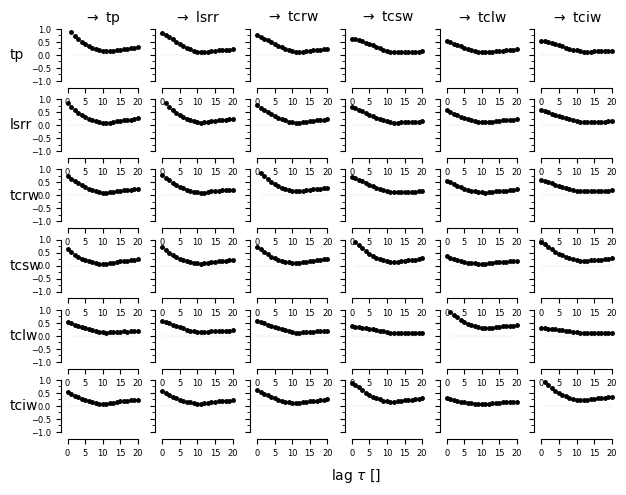

In [ ]:
plot_lagfuncs(
    val_matrix=lagged_correlations,
    setup_args={'var_names': selected_variables, 'x_base': 5, 'y_base': 0.5}
)
plt.show()

In [ ]:
from scipy.stats import t


n = df_tp.N
alpha = 0.05
significant_lags = {}

for i, var1 in enumerate(selected_variables):
    for j, var2 in enumerate(selected_variables):
        if i != j:
            for lag in range(1, tau_max + 1):
                correlation = lagged_correlations[i, j, lag - 1]

                # Compute t-statistic
                t_stat = correlation * ((n - 2) ** 0.5) / ((1 - correlation**2) ** 0.5)

                # Compute p-value
                p_value = 2 * (1 - t.cdf(abs(t_stat), df=n - 2))

                # Check if significant
                if p_value < alpha:
                    if (var1, var2) not in significant_lags:
                        significant_lags[(var1, var2)] = []
                    significant_lags[(var1, var2)].append((lag, correlation, p_value))

print("\nSignificant Lagged Correlations:")
for (var1, var2), results in significant_lags.items():
    print(f"{var1} → {var2}:")
    for lag, corr, p_val in results:
        print(f"  Lag {lag}: Correlation = {corr:.4f}, p-value = {p_val:.4f}")


Significant Lagged Correlations:
tp → lsrr:
  Lag 1: Correlation = 0.8335, p-value = 0.0393
lsrr → tp:
  Lag 1: Correlation = 0.8335, p-value = 0.0393
tcsw → tciw:
  Lag 1: Correlation = 0.8993, p-value = 0.0147
  Lag 2: Correlation = 0.8193, p-value = 0.0460
tciw → tcsw:
  Lag 1: Correlation = 0.8993, p-value = 0.0147
  Lag 2: Correlation = 0.8181, p-value = 0.0466


In [ ]:
pcmci.verbosity = 1
results = pcmci.run_pcmciplus(tau_max=8, pc_alpha=0.01)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = [0.01]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable tp has 7 link(s):
        (tp -1): max_pval = 0.00000, |min_val| =  0.652
        (lsrr -1): max_pval = 0.00000, |min_val| =  0.073
        (tp -2): max_pval = 0.00000, |min_val| =  0.068
        (tclw -1): max_pval = 0.00000, |min_val| =  0.048
        (tp -7): max_pval = 0.00000, |min_val| =  0.027
        (tcrw -2): max_pval = 0.00000, |min_val| =  0.025
        (tp -3): max_pval = 0.00000, |min_val| =  0.022

    Variable lsrr has 7 link(s):
        (lsrr -1): max_pval = 0.00000, |min_val| =  0.505
        (tp -1): max_pval = 0.00000, |min_val| =  0.197
        (tp -2): max_pval = 0.00000, |min_val| =  0.061
        (tclw -1): max_pval = 0.00000, |min_val| =  0.041
        (tp -7): max_pval = 0.00000, |min_val| =  0.034
        (tp -3): ma

In [ ]:
print("p-values")
print (results['p_matrix'].round(3))
print("MCI partial correlations")
print (results['val_matrix'].round(2))

p-values
[[[1.    0.    0.632 0.    0.313 0.018 0.045 0.463 0.021]
  [0.    0.    0.128 0.003 0.216 0.472 0.748 0.    0.067]
  [0.    0.    0.083 0.012 0.512 0.345 0.943 0.751 0.117]
  [0.    0.11  0.017 0.254 0.405 0.016 0.274 0.017 0.548]
  [0.    0.209 0.583 0.331 0.272 0.389 0.059 0.265 0.782]
  [0.    0.578 0.661 0.072 0.046 0.043 0.189 0.095 0.093]]

 [[0.    0.    0.034 0.014 0.028 0.62  0.092 0.181 0.03 ]
  [1.    0.    0.032 0.035 0.634 0.165 0.04  0.028 0.216]
  [0.    0.    0.859 0.679 0.545 0.868 0.017 0.547 0.2  ]
  [0.    0.379 0.012 0.066 0.537 0.116 0.725 0.014 0.03 ]
  [0.    0.063 0.53  0.138 0.062 0.877 0.043 0.335 0.088]
  [0.061 0.008 0.097 0.142 0.086 0.694 0.438 0.043 0.494]]

 [[0.    0.068 0.684 0.022 0.064 0.43  0.635 0.08  0.109]
  [0.    0.038 0.216 0.547 0.041 0.948 0.015 0.122 0.352]
  [1.    0.    0.    0.012 0.032 0.672 0.578 0.208 0.062]
  [0.    0.06  0.678 0.157 0.245 0.16  0.374 0.315 0.739]
  [0.    0.073 0.21  0.03  0.091 0.488 0.05  0.302 0.056]
 

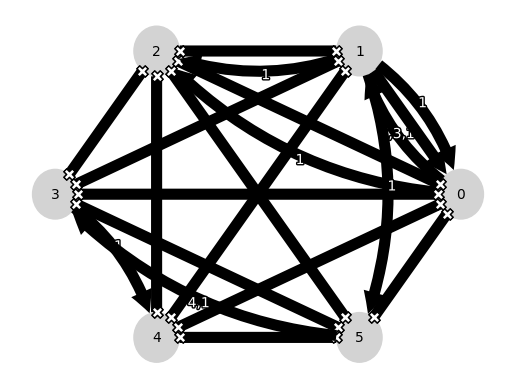

In [ ]:
tp.plot_graph(results['graph']); plt.show()

In [ ]:
# import numpy as np
# from tigramite.plotting import plot_graph
# import matplotlib.pyplot as plt

# # Assume `results` and `selected_variables` are defined
# graph = results['graph'].copy()  # Shape: (n_vars, n_vars, n_lags)
# val_matrix = results['val_matrix']  # Strength matrix for edge resolution

# # Step 1: Convert CPDAG to DAG by resolving 'x-x' and 'o-o'
# for i in range(graph.shape[0]):
#     for j in range(graph.shape[1]):
#         if i != j:
#             # Resolve 'x-x' edges
#             if 'x-x' in graph[i, j, :]:
#                 influence_i_to_j = np.abs(val_matrix[i, j, :]).sum()
#                 influence_j_to_i = np.abs(val_matrix[j, i, :]).sum()

#                 if influence_i_to_j > influence_j_to_i:
#                     graph[i, j, :] = '-->'
#                     graph[j, i, :] = ''  # Clear reverse edge
#                 elif influence_j_to_i > influence_i_to_j:
#                     graph[j, i, :] = '-->'
#                     graph[i, j, :] = ''  # Clear forward edge
#                 else:
#                     graph[i, j, :] = ''
#                     graph[j, i, :] = ''

#             # Resolve 'o-o' edges to a single direction
#             if 'o-o' in graph[i, j, :]:
#                 influence_i_to_j = np.abs(val_matrix[i, j, :]).sum()
#                 influence_j_to_i = np.abs(val_matrix[j, i, :]).sum()

#                 if influence_i_to_j > influence_j_to_i:
#                     graph[i, j, :] = '-->'
#                     graph[j, i, :] = ''
#                 elif influence_j_to_i > influence_i_to_j:
#                     graph[j, i, :] = '-->'
#                     graph[i, j, :] = ''
#                 else:
#                     graph[i, j, :] = ''
#                     graph[j, i, :] = ''

# # Step 2: Remove Cycles Using Topological Sorting
# def enforce_dag(graph):
#     n = graph.shape[0]
#     for lag in range(graph.shape[2]):
#         in_degrees = np.zeros(n, dtype=int)
#         for i in range(n):
#             for j in range(n):
#                 if graph[i, j, lag] == '-->':
#                     in_degrees[j] += 1

#         # Perform topological sort and remove edges if cycles are detected
#         visited = set()
#         while len(visited) < n:
#             cycle_detected = True
#             for node in range(n):
#                 if node not in visited and in_degrees[node] == 0:
#                     visited.add(node)
#                     for neighbor in range(n):
#                         if graph[node, neighbor, lag] == '-->':
#                             in_degrees[neighbor] -= 1
#                     cycle_detected = False
#             if cycle_detected:
#                 # If a cycle is detected, break it by removing one edge
#                 for i in range(n):
#                     for j in range(n):
#                         if graph[i, j, lag] == '-->':
#                             graph[i, j, lag] = ''
#                             in_degrees[j] -= 1
#                             break

# enforce_dag(graph)

# # Step 3: Enforce Lag-Zero Consistency
# for i in range(graph.shape[0]):
#     for j in range(graph.shape[1]):
#         if i != j:
#             if graph[i, j, 0] == '-->' and graph[j, i, 0] != '':
#                 graph[j, i, 0] = ''
#             elif graph[j, i, 0] == '-->' and graph[i, j, 0] != '':
#                 graph[i, j, 0] = ''

# # Step 4: Verify DAG and Plot
# def has_cycles(graph):
#     n = graph.shape[0]
#     visited = [False] * n
#     stack = [False] * n

#     def dfs(v):
#         visited[v] = True
#         stack[v] = True
#         for u in range(n):
#             if graph[v, u, 0] == '-->':
#                 if not visited[u]:
#                     if dfs(u):
#                         return True
#                 elif stack[u]:
#                     return True
#         stack[v] = False
#         return False

#     for node in range(n):
#         if not visited[node]:
#             if dfs(node):
#                 return True
#     return False

# if has_cycles(graph):
#     print("Error: The resulting graph still contains cycles!")
# else:
#     print("The resulting DAG is cycle-free and ready for plotting.")

# # Step 5: Plot the Clean DAG
# try:
#     print(f"Graph shape: {graph.shape}")
#     plot_graph(graph, var_names=selected_variables, figsize=(10, 8))
#     plt.show()
#     print("Graph plotted successfully!")
# except Exception as e:
#     print(f"Error during plotting: {e}")


Modified graph after clearing lag-zero links:
[[['' '-->' '' '-->' '' '' '' '' '']
  ['' '-->' '' '-->' '' '' '' '-->' '']
  ['' '-->' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '']]

 [['' '-->' '' '' '' '' '' '' '']
  ['' '-->' '' '' '' '' '' '' '']
  ['' '-->' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '']
  ['' '-->' '' '' '' '' '' '' '']]

 [['' '' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '']
  ['' '-->' '-->' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '']]

 [['' '' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '']
  ['' '-->' '-->' '' '' '' '' '' '']
  ['' '-->' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '']]

 [['' '' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '']
  ['' '-->' '-->' '' '-->' '' '' 

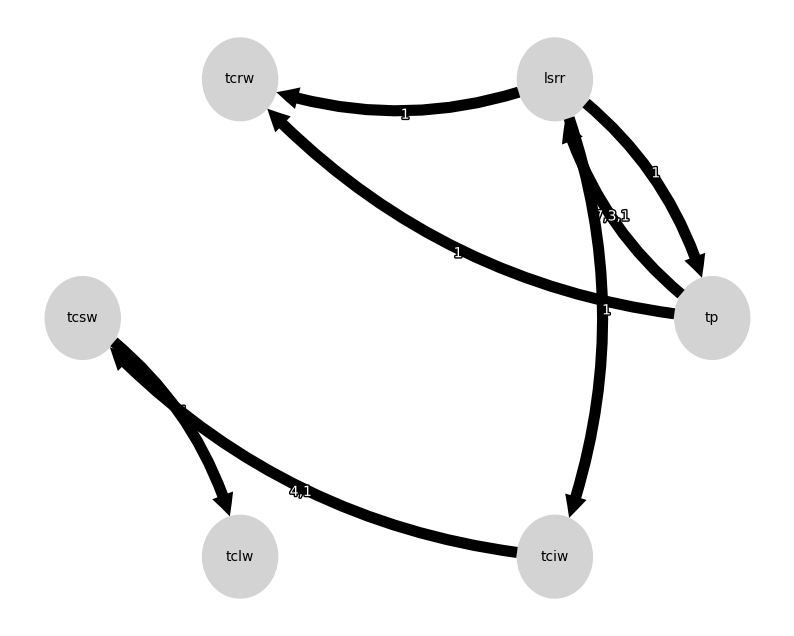

Graph plotted successfully!


In [ ]:
import numpy as np
from tigramite.plotting import plot_graph
import matplotlib.pyplot as plt

# Assume `results` and `selected_variables` are defined
graph = results['graph'].copy()  # Shape: (n_vars, n_vars, n_lags)

# Step 1: Remove ALL lag-zero links
graph[..., 0] = ''  # Clear all lag-zero links

# Step 2: Resolve conflicts in 'x-x' and convert to 'o-o'
for i in range(graph.shape[0]):
    for j in range(graph.shape[1]):
        if i != j:
            # If 'x-x' exists, resolve to 'o-o'
            if 'x-x' in graph[i, j, :]:
                graph[i, j, :] = 'o-o'
                graph[j, i, :] = 'o-o'

# Step 3: Debug the modified graph
print("Modified graph after clearing lag-zero links:")
print(graph)

# Step 4: Plot the cleaned graph
try:
    print(f"Graph shape: {graph.shape}")
    plot_graph(graph, var_names=selected_variables, figsize=(10, 8))
    plt.show()
    print("Graph plotted successfully!")
except Exception as e:
    print(f"Error during plotting: {e}")


In [ ]:
print("Resolved DAG Matrix:")
print(dag)


Resolved DAG Matrix:
[[['' '-->' '' '-->' '' '' '' '' '']
  ['<--' '-->' '' '-->' '' '' '' '-->' '']
  ['o-o' '-->' '' '' '' '' '' '' '']
  ['o-o' '' '' '' '' '' '' '' '']
  ['o-o' '' '' '' '' '' '' '' '']
  ['o-o' '' '' '' '' '' '' '' '']]

 [['-->' '-->' '' '' '' '' '' '' '']
  ['' '-->' '' '' '' '' '' '' '']
  ['o-o' '-->' '' '' '' '' '' '' '']
  ['o-o' '' '' '' '' '' '' '' '']
  ['o-o' '' '' '' '' '' '' '' '']
  ['' '-->' '' '' '' '' '' '' '']]

 [['o-o' '' '' '' '' '' '' '' '']
  ['o-o' '' '' '' '' '' '' '' '']
  ['' '-->' '-->' '' '' '' '' '' '']
  ['o-o' '' '' '' '' '' '' '' '']
  ['o-o' '' '' '' '' '' '' '' '']
  ['o-o' '' '' '' '' '' '' '' '']]

 [['o-o' '' '' '' '' '' '' '' '']
  ['o-o' '' '' '' '' '' '' '' '']
  ['o-o' '' '' '' '' '' '' '' '']
  ['' '-->' '-->' '' '' '' '' '' '']
  ['' '-->' '' '' '' '' '' '' '']
  ['o-o' '' '' '' '' '' '' '' '']]

 [['o-o' '' '' '' '' '' '' '' '']
  ['o-o' '' '' '' '' '' '' '' '']
  ['o-o' '' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' ''

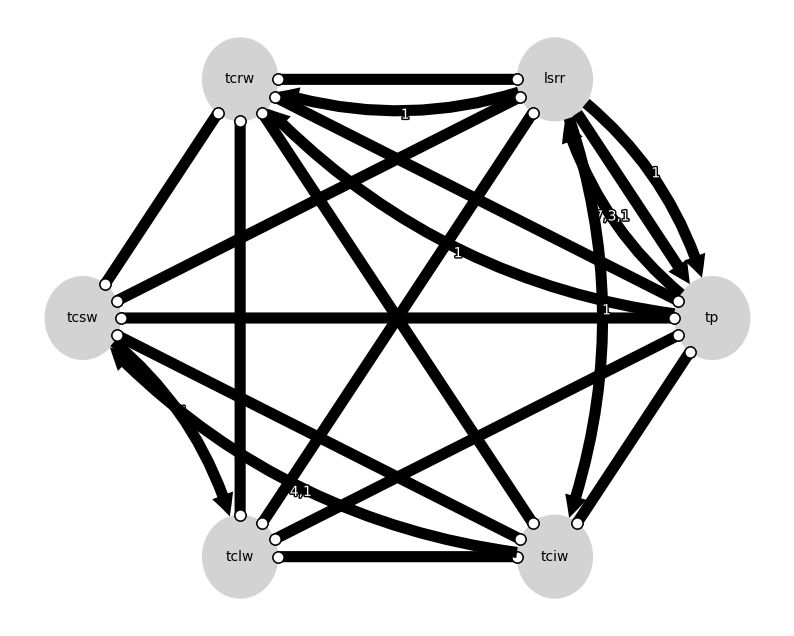

In [ ]:
val_matrix = results['val_matrix']
variable_order = np.argsort(
                    np.abs(val_matrix).sum(axis=(0,2)))[::-1]

# Transform conflicting links to unoriented links as a hack, might not work...
graph = results['graph']
graph[graph=='x-x'] = 'o-o'
dag = pcmci._get_dag_from_cpdag(
                cpdag_graph=graph,
                variable_order=variable_order)

tp.plot_graph(dag, var_names=selected_variables, figsize=(10, 8)); plt.show()

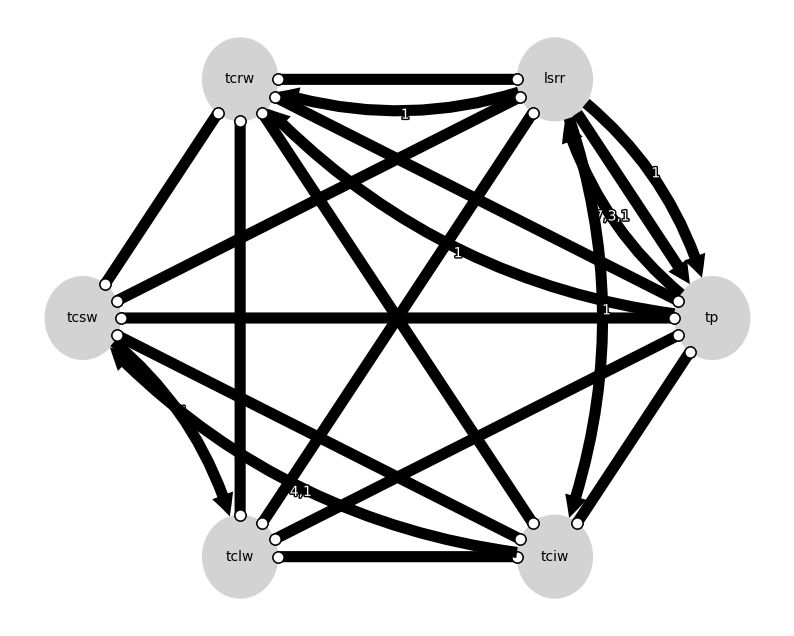

In [ ]:


# Assuming results['graph'] and results['val_matrix'] are already computed from PCMCI+
graph = results['graph']  # This is the CPDAG (contains x-x for undirected edges)
val_matrix = results['val_matrix']  # Contains the relationship strengths

# Step 1: Determine the variable order based on importance
variable_order = np.argsort(
    np.abs(val_matrix).sum(axis=(0, 2))
)[::-1]  # Rank variables by total influence (descending order)

# Step 2: Resolve undirected edges (x-x) to o-o (temporary format for DAG extraction)
graph[graph == 'x-x'] = 'o-o'

# Step 3: Convert CPDAG to a DAG using the resolved variable order
dag = pcmci._get_dag_from_cpdag(
    cpdag_graph=graph,
    variable_order=variable_order
)

# Step 4: Visualize the DAG
# Replace `selected_columns` with the names of your variables (e.g., dataset.columns.tolist())
plot_graph(dag, var_names=selected_variables, figsize=(10, 8))
plt.show()


In [ ]:
print(type(results['graph']))
print(results['graph'].shape)
print(results['graph'])

<class 'numpy.ndarray'>
(6, 6, 21)
[[['' '-->' '-->' '' '' '' '' '-->' '' '' '' '' '' '' '-->' '' '' '' ''
   '' '-->']
  ['x-x' '-->' '' '-->' '' '' '' '-->' '' '' '' '' '' '' '' '' '' '' ''
   '' '']
  ['x-x' '-->' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '' '' '' '-->' '' '' '' '' '' '' '' '' '']
  ['x-x' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '']
  ['x-x' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '']]

 [['x-x' '-->' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '']
  ['' '-->' '' '' '' '' '' '' '' '' '' '' '' '' '-->' '-->' '-->' '' ''
   '' '']
  ['x-x' '-->' '' '' '' '' '' '' '' '' '-->' '' '' '' '' '' '' '' '' ''
   '']
  ['x-x' '' '-->' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '']
  ['x-x' '' '' '' '' '' '-->' '' '' '' '' '' '' '' '' '' '' '' '' '' '']
  ['' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '']]

 [['x-x' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '

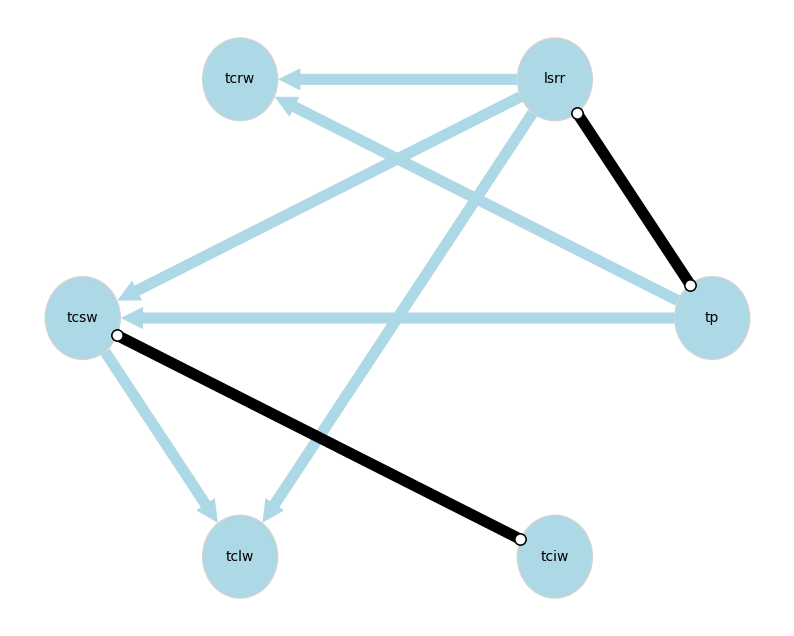

In [ ]:
import numpy as np
from tigramite.plotting import plot_graph
import matplotlib.pyplot as plt

# Extract the adjacency matrix (causal graph)
causal_graph = results['graph']  # Shape: (6, 6, 21)

# Initialize a directed graph matrix
directed_graph = np.zeros(causal_graph.shape[:2], dtype=bool)  # Shape: (6, 6)

# Loop through each pair of variables
for i in range(causal_graph.shape[0]):
    for j in range(causal_graph.shape[1]):
        # Check if there is at least one directed edge ('-->') across all lags
        if '-->' in causal_graph[i, j, :]:
            directed_graph[i, j] = True  # Mark as a directed edge

# Visualize the filtered graph
fig, ax = plot_graph(directed_graph, var_names=selected_variables, figsize=(10, 8))

# Customize node colors using matplotlib directly
for patch in ax.patches:
    patch.set_facecolor('lightblue')

# Display the plot
plt.show()


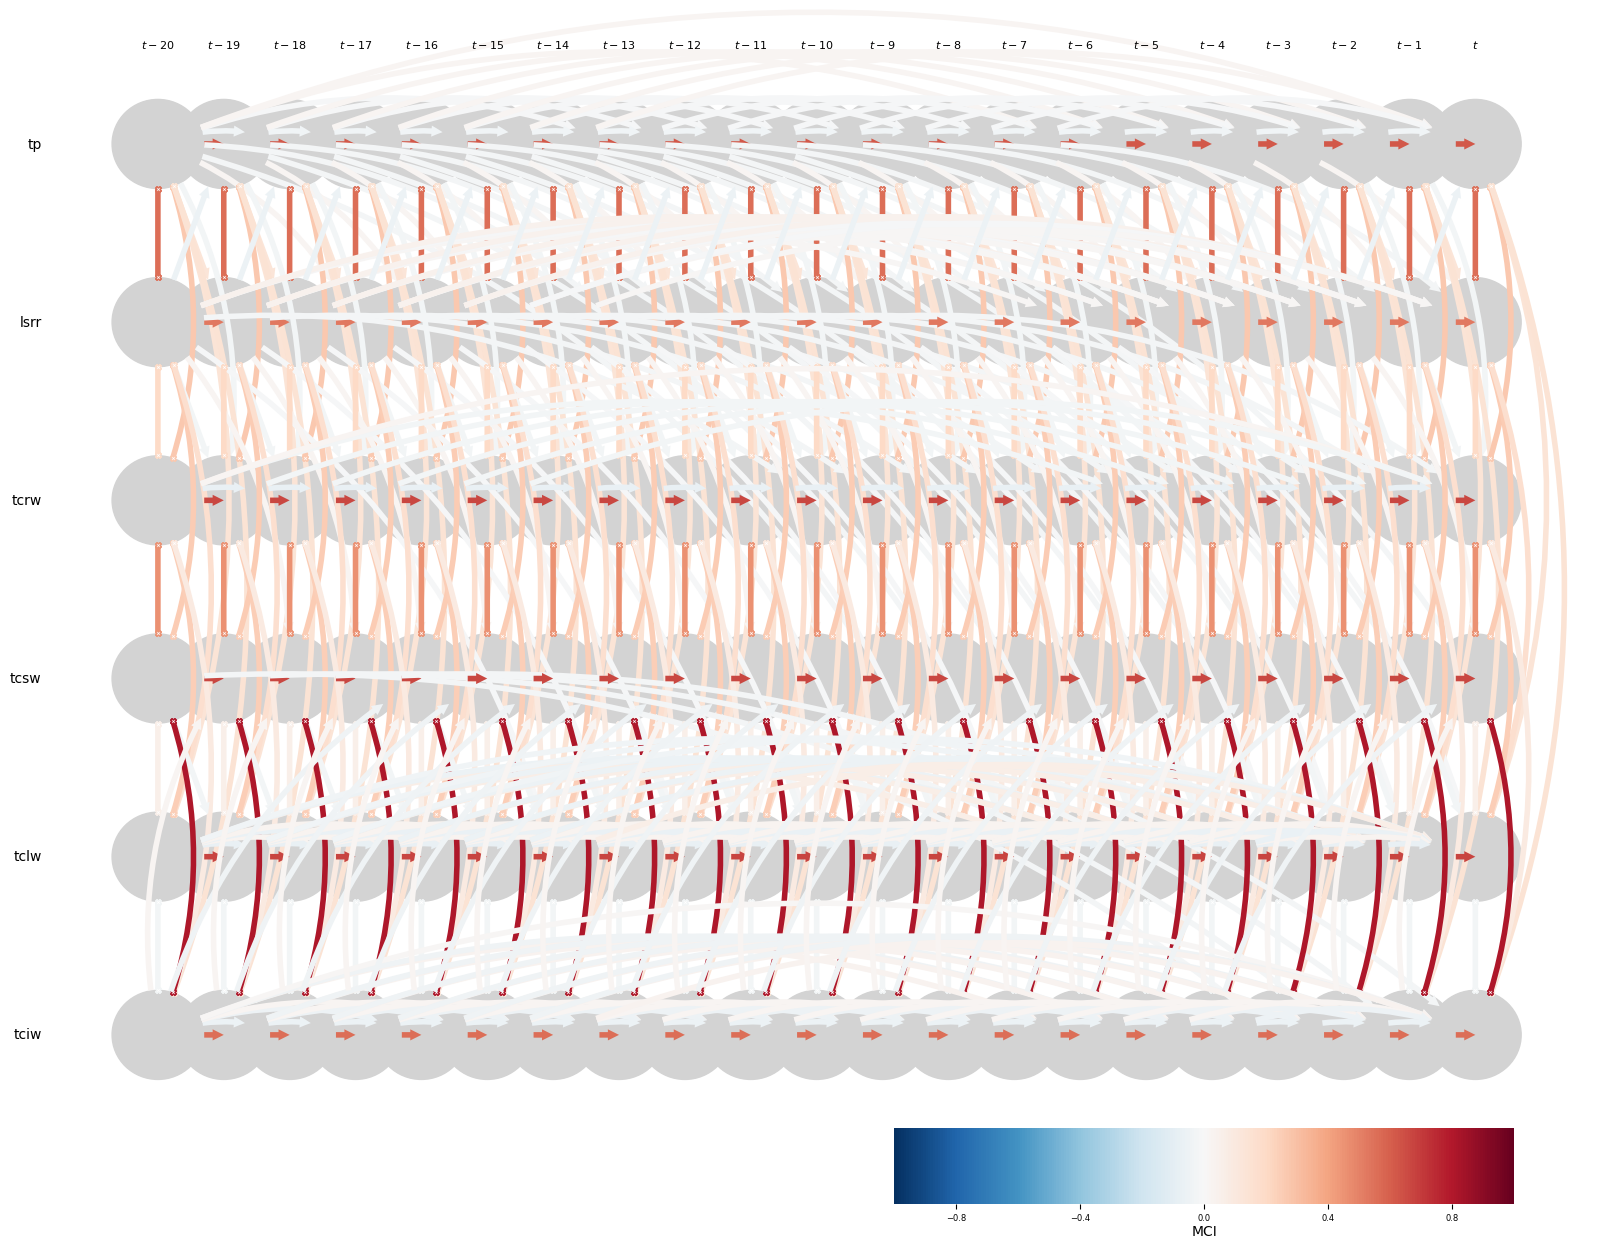

In [ ]:
tp.plot_time_series_graph(
    figsize=(20, 14),
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=selected_variables,
    link_colorbar_label='MCI',
    ); plt.show()

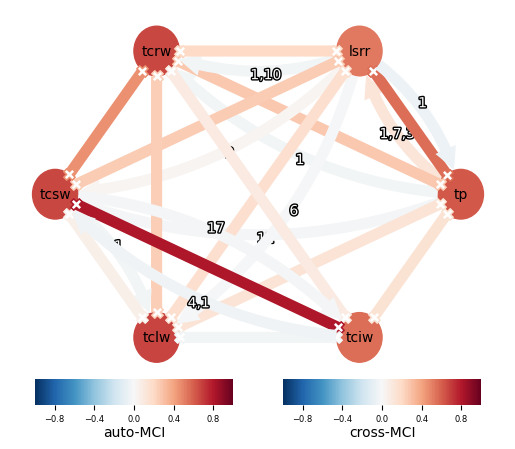

In [ ]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=selected_variables,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    ); plt.show()